<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparing" data-toc-modified-id="Data-Preparing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparing</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Inference" data-toc-modified-id="Inference-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inference</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li></ul></li></ul></div>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, GroupKFold, LeaveOneOut, LeaveOneGroupOut
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import tensorflow as tf
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer, Dense, Flatten, Dropout, Concatenate, Add, Dot, Multiply, Reshape, Activation, BatchNormalization, LayerNormalization, SimpleRNNCell, RNN, SimpleRNN, LSTM, Embedding, Bidirectional, TimeDistributed, Conv1D, Conv1DTranspose, Conv2D, Conv2DTranspose, MaxPool1D, MaxPool2D, GlobalMaxPool1D, GlobalMaxPool2D, AveragePooling1D, AveragePooling2D, GlobalAveragePooling1D, GlobalAveragePooling2D, ZeroPadding2D, RepeatVector
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adagrad, Adam
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
# MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, CosineSimilarity
from tensorflow.keras import losses
# MeanSquaredError, RootMeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, CosineSimilarity
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.activations import linear, sigmoid, relu
from tensorflow.keras.initializers import RandomNormal, glorot_uniform, he_uniform, Constant

plt.style.use("dark_background")

# Data Preparing

In [19]:
raw_data = pd.read_hdf("D:/assets.h5", key="quandl/wiki/prices")

In [34]:
data = raw_data["adj_close"]
data = data.unstack("ticker")
tickers = ["AAPL", "BA", "CAT", "DIS", "FB", "GE", "IBM", "KO", "TSLA"]
data = data[tickers]
data = data.dropna()
# data.asfreq("D")

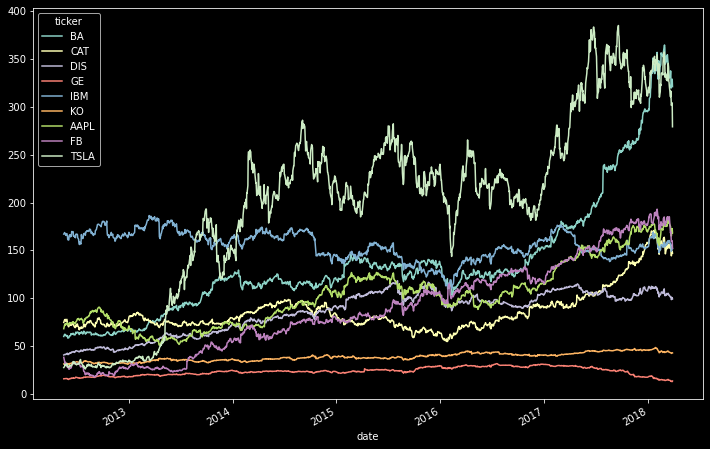

In [35]:
data.plot.line(figsize=(12, 8));

In [68]:
sc = StandardScaler()
data_norm = sc.fit_transform(data)
X = data_norm.T
X = X[..., None]

# Modeling

In [81]:
timesteps = X.shape[1]
input_dim = X.shape[2]

inputs = Input(shape=(timesteps, input_dim))

z = LSTM(units=500, return_sequences=False)(inputs) 
latent_rep = Dense(units=100)(z)
z = RepeatVector(timesteps)(latent_rep)

outputs = LSTM(input_dim, return_sequences=True)(z)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1471, 1)]         0         
                                                                 
 lstm_10 (LSTM)              (None, 500)               1004000   
                                                                 
 dense_7 (Dense)             (None, 100)               50100     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 1471, 100)        0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 1471, 1)           408       
                                                                 
Total params: 1,054,508
Trainable params: 1,054,508
Non-trainable params: 0
_________________________________________________

In [83]:
model.compile(optimizer="adam", loss="mse")
model.fit(x=X, y=X, epochs=100, verbose=2)

Epoch 1/100
1/1 - 27s - loss: 1.1100 - 27s/epoch - 27s/step
Epoch 2/100
1/1 - 26s - loss: 1.0597 - 26s/epoch - 26s/step
Epoch 3/100
1/1 - 29s - loss: 1.0075 - 29s/epoch - 29s/step
Epoch 4/100
1/1 - 30s - loss: 1.0014 - 30s/epoch - 30s/step
Epoch 5/100
1/1 - 30s - loss: 1.0010 - 30s/epoch - 30s/step
Epoch 6/100
1/1 - 30s - loss: 1.0001 - 30s/epoch - 30s/step
Epoch 7/100
1/1 - 30s - loss: 1.0001 - 30s/epoch - 30s/step
Epoch 8/100
1/1 - 28s - loss: 1.0006 - 28s/epoch - 28s/step
Epoch 9/100
1/1 - 28s - loss: 1.0002 - 28s/epoch - 28s/step
Epoch 10/100
1/1 - 28s - loss: 1.0000 - 28s/epoch - 28s/step
Epoch 11/100
1/1 - 26s - loss: 1.0000 - 26s/epoch - 26s/step
Epoch 12/100
1/1 - 26s - loss: 1.0000 - 26s/epoch - 26s/step
Epoch 13/100
1/1 - 26s - loss: 1.0000 - 26s/epoch - 26s/step
Epoch 14/100
1/1 - 29s - loss: 1.0000 - 29s/epoch - 29s/step
Epoch 15/100


KeyboardInterrupt: 

# Inference

In [84]:
encoder = Model(inputs=inputs, outputs=latent_representation)
latent_rep = encoder.predict(X)

1/1 [==============================] - 2s 2s/step


## Principal Component Analysis

In [85]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=5)
latent_rep = tsne.fit_transform(latent_rep)

[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.000s...
[t-SNE] Computed neighbors for 9 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 1.123938
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.926407
[t-SNE] KL divergence after 300 iterations: 0.343950


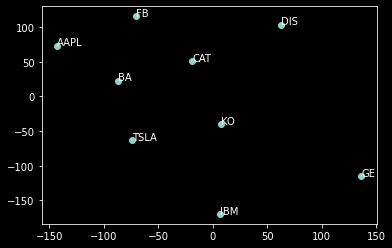

In [88]:
plt.scatter(latent_rep[:, 0], latent_rep[:, 1]);
for i, ticker in enumerate(tickers):
    plt.annotate(ticker, (latent_rep[:, 0][i], latent_rep[:, 1][i]));